# States with the highest Cigarette, SmokelessTobacco, and E-Cigarette use

# Analysis

Behavioral Risk Factor Data: Tobacco Use (2011 to 2019, Metadata Updated: August 18, 2021)The BRFSS is a continuous, state-based surveillance system that collects information about modifiable risk factors for chronic diseases and other leading causes of death. The data for the STATE System were extracted from the annual BRFSS surveys from participating states. Tobacco topics included are cigarette and e-cigarette use prevalence by demographics, cigarette and e-cigarette use frequency, and quit attempts.


## Findings:
Based on the provided data, The states with the highest use of four types of tobacco: Cigarette, Smokeless, E-cig and Cessation (Adults). Cigarette(Adult) is the highest tobacco used among all states. As per the question requirement the analysis has done for three types of Tobacco. After grouping the data by state and finding the mean percentage of smokers or tobacco users, analysis found that West Virginia has the highest percentage of cigarette smokers, National Median(States and DC) has the highest percentage of smokeless tobacco users and  e-cig users. These findings are supported by the three visualizations produced by the code. Each visualization is clear and accurately labelled, making it easy to understand the data. Over all 

## Conclusion:

In conclusion, the provided data shows that certain states have a higher percentage of tobacco users compared to others. Overall, the project has successfully answered the questions posed in the project proposal and supported the findings with ample and precise explanation and visualizations. The analysis involved aggregation, comparison, and summary statistics, demonstrating the application of key statistical concepts to real-world data.

"This information can be useful for public health officials to develop targeted interventions and policies to reduce tobacco use in these states."



In [3]:
# Import Dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Read CSV file
data_file = pd.read_csv("./Resources/Clean_Tobacco_data.csv")

In [5]:
# Print the data
data_file.head()


,Unnamed: 0,YEAR,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Sample_Size,Gender,Race,Age
0,0,2019,National Median (States and DC),Cessation (Adults),Percent of Former Smokers Among Ever Smokers,NaN,60.8,NaN,Overall,All Races,All Ages
1,1,2019,New Hampshire,Cigarette Use (Adults),Smoking Frequency,Every Day,76.3,357.0,Female,All Races,All Ages
2,2,2019,Florida,Cigarette Use (Adults),Current Smoking,NaN,14.8,15824.0,Overall,All Races,All Ages
3,3,2019,Hawaii,Smokeless Tobacco Use (Adults),Current Use,NaN,2.1,459.0,Overall,All Races,18 to 24 Years
4,4,2019,Alabama,Smokeless Tobacco Use (Adults),User Status,Not Current,88.6,2729.0,Male,All Races,All Ages


In [6]:
# Drop all rows with missing information
data_file.dropna(how = "any")

,Unnamed: 0,YEAR,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Sample_Size,Gender,Race,Age
1,1,2019,New Hampshire,Cigarette Use (Adults),Smoking Frequency,Every Day,76.3,357.0,Female,All Races,All Ages
4,4,2019,Alabama,Smokeless Tobacco Use (Adults),User Status,Not Current,88.6,2729.0,Male,All Races,All Ages
5,5,2019,New Hampshire,Smokeless Tobacco Use (Adults),Frequency of Use,Some Days,55.2,82.0,Overall,All Races,All Ages
6,6,2019,South Carolina,Cigarette Use (Adults),Smoking Status,Current,15.8,3761.0,Female,All Races,All Ages
8,8,2019,Michigan,Cigarette Use (Adults),Smoking Status,Current,17.2,5662.0,Female,All Races,All Ages
...,...,...,...,...,...,...,...,...,...,...,...
33194,33194,2011,Nebraska,Cigarette Use (Adults),Smoking Status,Current,22.1,10189.0,Male,All Races,All Ages
33198,33198,2011,North Carolina,Cigarette Use (Adults),Smoking Status,Current,24.5,4294.0,Male,All Races,All Ages
33199,33199,2012,Texas,Cigarette Use (Adults),Smoking Status,Former,17.3,5319.0,Female,All Races,All Ages
33201,33201,2011,California,Cigarette Use (Adults),Smoking Status,Never,62.5,17985.0,Overall,All Races,All Ages


In [7]:
data_file.count()

Unnamed: 0      33206
YEAR            33206
LocationDesc    33206
TopicDesc       33206
MeasureDesc     33206
Response        15018
Data_Value      32345
Sample_Size     32267
Gender          33206
Race            33206
Age             33206
dtype: int64

In [8]:
# Find out number of years
unique_year = data_file["YEAR"].unique()
unique_year

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011], dtype=int64)

In [9]:
# Find out unique number of States.unique()
unique_states = data_file["LocationDesc"].unique()
unique_states

array(['National Median (States and DC)', 'New Hampshire', 'Florida',
       'Hawaii', 'Alabama', 'South Carolina', 'Kentucky', 'Michigan',
       'Illinois', 'Pennsylvania', 'Ohio', 'Massachusetts',
       'North Carolina', 'Guam', 'Missouri', 'Minnesota', 'Nevada',
       'Louisiana', 'District of Columbia', 'Maine', 'Oregon', 'Alaska',
       'Puerto Rico', 'Mississippi', 'Iowa', 'New Mexico', 'Vermont',
       'Georgia', 'Nebraska', 'Wisconsin', 'Maryland', 'Indiana',
       'California', 'Virginia', 'Tennessee', 'New York', 'Kansas',
       'Rhode Island', 'Arkansas', 'West Virginia', 'Delaware',
       'North Dakota', 'Idaho', 'Montana', 'Connecticut', 'New Jersey',
       'Washington', 'Arizona', 'Utah', 'Wyoming', 'Texas', 'Oklahoma',
       'South Dakota', 'Colorado'], dtype=object)

In [10]:
# Count State values 
state_count = data_file["LocationDesc"].value_counts()
state_count.head(10)

Georgia          636
Arkansas         636
Alaska           636
Montana          636
Mississippi      636
Iowa             636
Idaho            636
North Dakota     636
New Hampshire    636
Nebraska         636
Name: LocationDesc, dtype: int64

In [11]:
# Rename the Columnnames for better understanding
data_file = data_file.rename(columns = {"YEAR": "Year", "LocationDesc" : "State", "TopicDesc" : "Tobacco Use", 
                                        "Data_Value": "Percentage", "Sample_Size" : "Sample Size"})
data_file.head(10)

,Unnamed: 0,Year,State,Tobacco Use,MeasureDesc,Response,Percentage,Sample Size,Gender,Race,Age
0,0,2019,National Median (States and DC),Cessation (Adults),Percent of Former Smokers Among Ever Smokers,NaN,60.8,NaN,Overall,All Races,All Ages
1,1,2019,New Hampshire,Cigarette Use (Adults),Smoking Frequency,Every Day,76.3,357.0,Female,All Races,All Ages
2,2,2019,Florida,Cigarette Use (Adults),Current Smoking,NaN,14.8,15824.0,Overall,All Races,All Ages
3,3,2019,Hawaii,Smokeless Tobacco Use (Adults),Current Use,NaN,2.1,459.0,Overall,All Races,18 to 24 Years
4,4,2019,Alabama,Smokeless Tobacco Use (Adults),User Status,Not Current,88.6,2729.0,Male,All Races,All Ages
5,5,2019,New Hampshire,Smokeless Tobacco Use (Adults),Frequency of Use,Some Days,55.2,82.0,Overall,All Races,All Ages
6,6,2019,South Carolina,Cigarette Use (Adults),Smoking Status,Current,15.8,3761.0,Female,All Races,All Ages
7,7,2019,Kentucky,Smokeless Tobacco Use (Adults),Current Use,NaN,7.8,629.0,Overall,All Races,Age 20 and Older
8,8,2019,Michigan,Cigarette Use (Adults),Smoking Status,Current,17.2,5662.0,Female,All Races,All Ages
9,9,2019,Illinois,Smokeless Tobacco Use (Adults),Current Use,NaN,2.8,1882.0,Overall,All Races,45 to 64 Years


In [12]:
# Find out different types of tobacco use

tobacco_list = data_file['Tobacco Use'].unique()
tobacco_types1 = data_file['Tobacco Use'].nunique()
df_tobacco_types = pd.DataFrame(tobacco_list, columns=['tobacco_list'])

print("Number of tobacco types:", tobacco_types1)
print("tobacco_types: ", tobacco_list)


Number of tobacco types: 4
tobacco_types:  ['Cessation (Adults)' 'Cigarette Use (Adults)'
 'Smokeless Tobacco Use (Adults)' 'E-Cigarette Use (Adults)']


In [13]:
# Find out number of tobacco use per tobacco type
tobacco_count = data_file["Tobacco Use"].value_counts()
tobacco_count

Cigarette Use (Adults)            13860
Smokeless Tobacco Use (Adults)    12426
E-Cigarette Use (Adults)           4040
Cessation (Adults)                 2880
Name: Tobacco Use, dtype: int64

# Highest Tobacco Use by Tobacco Types
(Cigarette, Smokeless Tobacco Use, E-Cigarette Use)

In [14]:
# Finding the states with the highest cigarette use

cigarette_df = data_file[data_file["Tobacco Use"] == "Cigarette Use (Adults)"]
cigarette_state_count = cigarette_df.groupby("State")["Percentage"].mean().sort_values(ascending=False).head(10)

print("States with the highest cigarette use: ", cigarette_state_count[:10])


States with the highest cigarette use:  State
West Virginia                      34.186590
Kentucky                           33.952107
Guam                               33.603065
National Median (States and DC)    33.114815
Arkansas                           32.972414
Ohio                               32.618774
Louisiana                          32.435632
Tennessee                          32.378544
Missouri                           32.354023
Mississippi                        32.246743
Name: Percentage, dtype: float64


In [15]:
# Smokeless tobacco use
smokeless_df = data_file[data_file["Tobacco Use"] == "Smokeless Tobacco Use (Adults)"]
smokeless_state_count = smokeless_df.groupby("State")["Percentage"].mean().sort_values(ascending=False).head(10)
print("States with the highest smokeless tobacco use: ", smokeless_state_count[:10])

States with the highest smokeless tobacco use:  State
National Median (States and DC)    38.541667
Mississippi                        27.190171
Kentucky                           26.814530
Alabama                            26.147414
Wyoming                            26.107798
Montana                            26.105804
West Virginia                      25.767130
Nebraska                           25.756410
Guam                               25.561009
Alaska                             25.538288
Name: Percentage, dtype: float64


In [16]:
# States with the Highest E-Cig
ecig_df = data_file[data_file["Tobacco Use"] == "E-Cigarette Use (Adults)"]
ecig_state_count = ecig_df.groupby("State")["Percentage"].mean().sort_values(ascending=False).head(10)
print("States with the highest E-Cig use: ", ecig_state_count[:10])


States with the highest E-Cig use:  State
National Median (States and DC)    33.433333
Oklahoma                           24.167241
Wyoming                            23.686207
Arkansas                           23.633333
Indiana                            23.612644
Kentucky                           23.581034
Ohio                               23.535632
Nevada                             23.491379
Tennessee                          23.483908
Hawaii                             23.468966
Name: Percentage, dtype: float64


# States with Highest Tobacco use :

## Cigarette Use

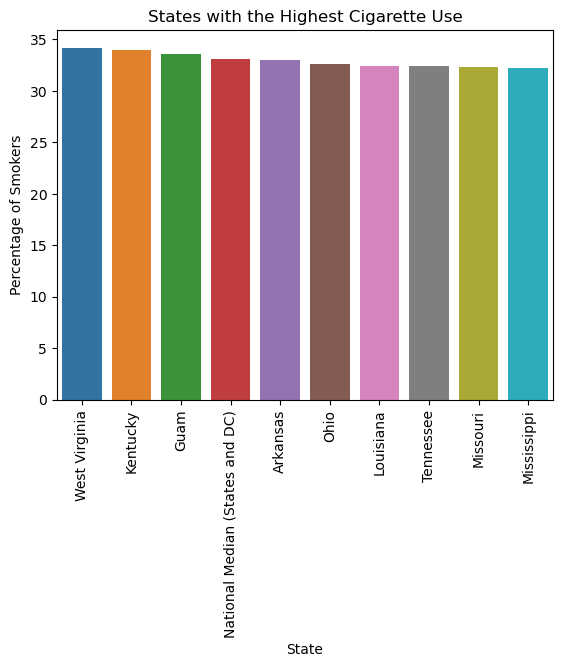

In [17]:
#States with the Highest Cigarette Use
sns.barplot(x=cigarette_state_count.index, y=cigarette_state_count.values)
plt.title("States with the Highest Cigarette Use")
plt.xlabel("State")
plt.ylabel("Percentage of Smokers")

plt.xticks(rotation = 90)
plt.show()

## Smokeless Tobacco

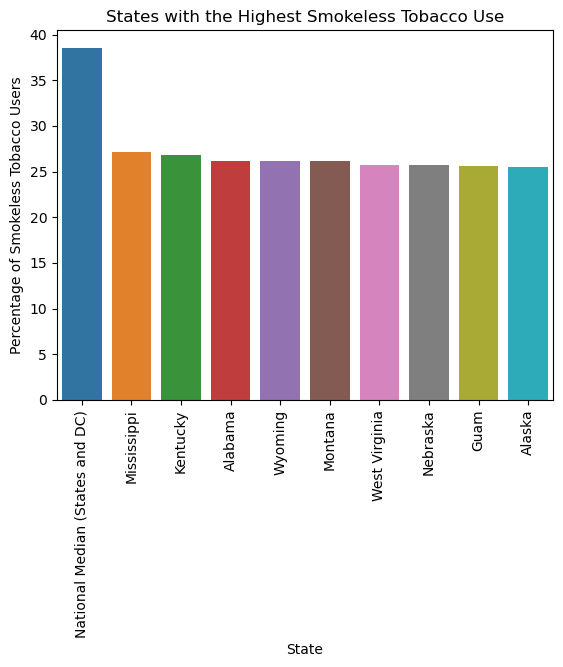

In [18]:
#States with the Highest smokeless tobacco use
sns.barplot(x=smokeless_state_count.index, y=smokeless_state_count.values)
plt.title("States with the Highest Smokeless Tobacco Use")
plt.xlabel("State")
plt.ylabel("Percentage of Smokeless Tobacco Users")
plt.xticks(rotation = 90)
plt.show()


## E-Cigarette Use

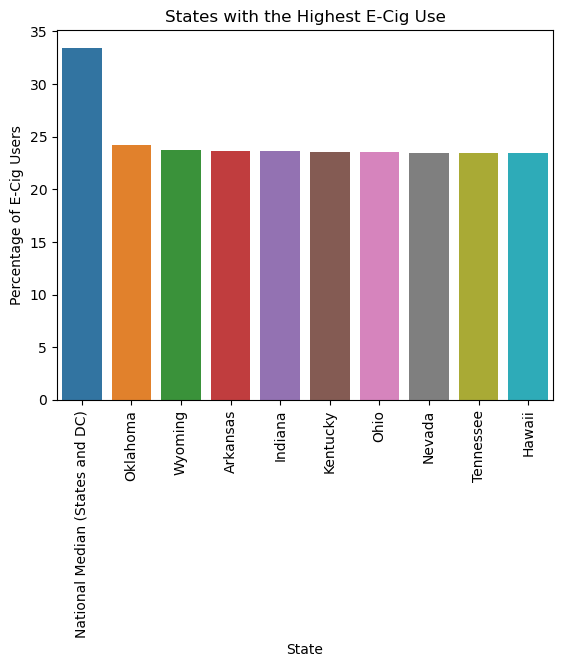

In [19]:
# #States with the Highest e-cigarette use
sns.barplot(x=ecig_state_count.index, y=ecig_state_count.values)
plt.title("States with the Highest E-Cig Use")
plt.xlabel("State")
plt.ylabel("Percentage of E-Cig Users")
plt.xticks(rotation = 90)
plt.show()

# Time Series Analysis for Cigarette, Smokeless Tobacco Use, E-Cigarette Use:

 ## Cigarette

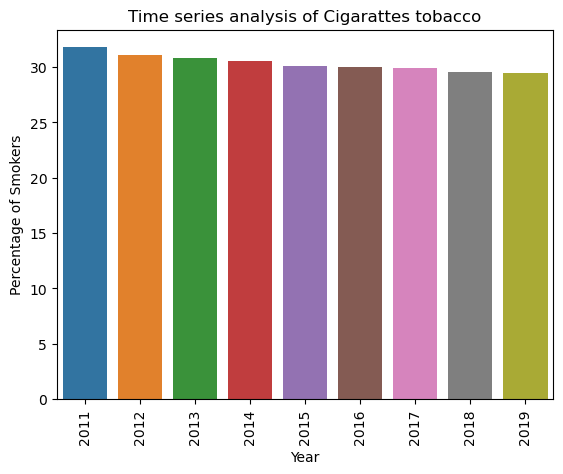

In [23]:
#Time series analysis of Cigarattes tobacco
cigarette_df = data_file[data_file["Tobacco Use"] == "Cigarette Use (Adults)"]
cigarette_state_count = cigarette_df.groupby("Year")["Percentage"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=cigarette_state_count.index, y=cigarette_state_count.values)
plt.title('Time series analysis of Cigarattes tobacco')

plt.xlabel("Year")
plt.ylabel("Percentage of Smokers")

plt.xticks(rotation = 90)
plt.show()

## Smokeless Tobacco Use

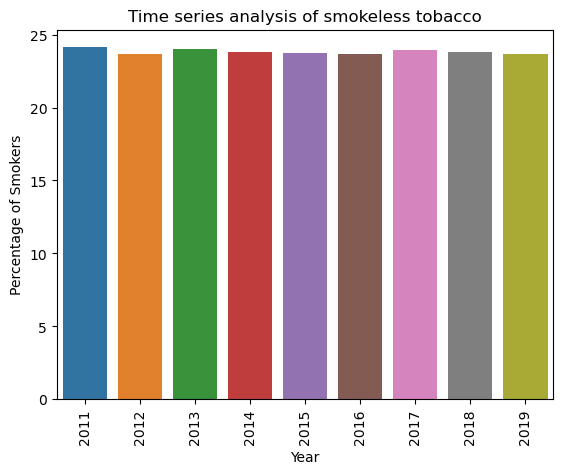

In [22]:
#Time series analysis of smokeless tobacco
cigarette_df = data_file[data_file["Tobacco Use"] == "Smokeless Tobacco Use (Adults)"]
cigarette_state_count = cigarette_df.groupby("Year")["Percentage"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=cigarette_state_count.index, y=cigarette_state_count.values)
plt.title('Time series analysis of smokeless tobacco')

plt.xlabel("Year")
plt.ylabel("Percentage of Smokers")

plt.xticks(rotation = 90)
plt.show()

## E-Cigarattes

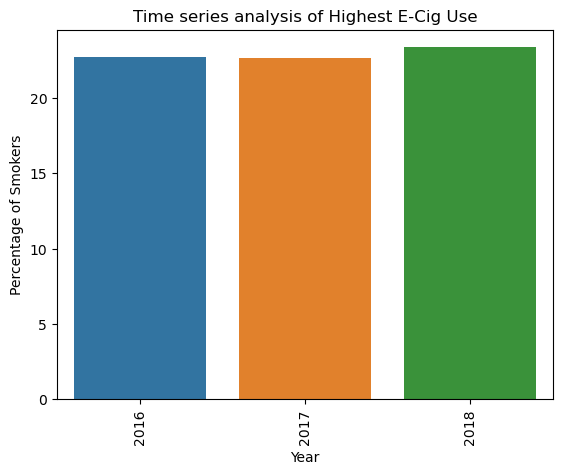

In [24]:
#Time series analysis of E-Cigarattes tobacco

cigarette_df = data_file[data_file["Tobacco Use"] == "E-Cigarette Use (Adults)"]
cigarette_state_count = cigarette_df.groupby("Year")["Percentage"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=cigarette_state_count.index, y=cigarette_state_count.values)
plt.title('Time series analysis of Highest E-Cig Use')
plt.xlabel("Year")
plt.ylabel("Percentage of Smokers")
plt.xticks(rotation = 90)
plt.show()

Source of the data : https://catalog.data.gov/dataset/behavioral-risk-factor-data-tobacco-use-2011-to-present